In [1]:
import zipfile
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras import layers
from keras.regularizers import l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import pylab as pl
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import itertools
import math
from keras.layers.recurrent import LSTM
from keras.models import load_model


# audio lib
import librosa
import librosa.display
from librosa.util import fix_length

import IPython.display as ipd
from PIL import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

# CNN MEL SPECTROGRAM APPROACH

In [3]:
df = pd.read_csv('../input/mel-4q/mel.csv')
df['ID_song'] = df['ID'].astype(str).str[0:4]

df_ID = pd.DataFrame()
df_ID['ID_song'] = df['ID_song'].drop_duplicates()

df_ID

,ID_song
0,1001
5,1002
9,1003
14,1004
19,1005
...,...
4088,1896
4092,1897
4096,1898
4101,1899


In [4]:
ID_train, ID_test = train_test_split( np.array(df_ID['ID_song']), test_size=0.20, shuffle = True,  random_state=1)
ID_test, ID_validation = train_test_split( ID_test, test_size=0.5, shuffle = True,  random_state=1)

print(ID_train.shape)
print(ID_test.shape)
print(ID_validation.shape)
ID_test

(720,)
(90,)
(90,)


array(['1524', '1387', '1878', '1155', '1188', '1009', '1373', '1321',
       '1857', '1412', '1020', '1389', '1635', '1018', '1632', '1035',
       '1086', '1799', '1082', '1208', '1070', '1447', '1299', '1624',
       '1742', '1559', '1364', '1278', '1528', '1890', '1502', '1239',
       '1838', '1482', '1342', '1454', '1544', '1057', '1856', '1429',
       '1494', '1542', '1118', '1872', '1434', '1195', '1711', '1595',
       '1781', '1625', '1797', '1575', '1217', '1671', '1095', '1633',
       '1658', '1652', '1522', '1295', '1881', '1085', '1415', '1683',
       '1263', '1196', '1831', '1219', '1102', '1256', '1369', '1712',
       '1585', '1243', '1787', '1578', '1556', '1206', '1004', '1409',
       '1245', '1747', '1341', '1161', '1112', '1332', '1892', '1060',
       '1492', '1734'], dtype=object)

In [5]:
y_train_ID = []
y_test_ID = []
y_validation_ID = []

for i in ID_train:
    if (i + '-0') in df['ID'].values:
        y_train_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_train_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_train_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_train_ID.append(i + '-3')
    if (i + '-4') in df['ID'].values:
        y_train_ID.append(i + '-4')

for i in ID_test:
    if (i + '-0') in df['ID'].values:
        y_test_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_test_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_test_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_test_ID.append(i + '-3')
    if (i + '-4') in df['ID'].values:
        y_test_ID.append(i + '-4')
        
for i in ID_validation:
    if (i + '-0') in df['ID'].values:
        y_validation_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_validation_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_validation_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_validation_ID.append(i + '-3')
    if (i + '-4') in df['ID'].values:
        y_validation_ID.append(i + '-4')
        
y_train_ID = np.array(y_train_ID)
y_test_ID = np.array(y_test_ID)
y_validation_ID = np.array(y_validation_ID)

print(y_train_ID.shape)
print(y_test_ID.shape)
print(y_validation_ID.shape)
y_test_ID[:100]

(3287,)
(416,)
(408,)


array(['1524-0', '1524-1', '1524-2', '1524-3', '1524-4', '1387-0',
       '1387-1', '1387-2', '1387-3', '1387-4', '1878-0', '1878-1',
       '1878-2', '1878-3', '1155-0', '1155-1', '1155-2', '1155-3',
       '1155-4', '1188-0', '1188-1', '1188-2', '1188-3', '1188-4',
       '1009-0', '1009-1', '1009-2', '1009-3', '1009-4', '1373-0',
       '1373-1', '1373-2', '1373-3', '1373-4', '1321-0', '1321-1',
       '1321-2', '1321-3', '1321-4', '1857-0', '1857-1', '1857-2',
       '1857-3', '1857-4', '1412-0', '1412-1', '1412-2', '1412-3',
       '1412-4', '1020-0', '1020-1', '1020-2', '1020-3', '1020-4',
       '1389-0', '1389-1', '1389-2', '1389-3', '1389-4', '1635-0',
       '1635-1', '1635-2', '1635-3', '1018-0', '1018-1', '1018-2',
       '1018-3', '1018-4', '1632-0', '1632-1', '1632-2', '1632-3',
       '1035-0', '1035-1', '1035-2', '1035-3', '1035-4', '1086-0',
       '1086-1', '1086-2', '1086-3', '1086-4', '1799-0', '1799-1',
       '1799-2', '1799-3', '1082-0', '1082-1', '1082-2', '1082

In [6]:
path = '../input/mel-4q/melspectrogram_dataset/'


# Load the images and the labels
x_train = []
x_test = []
x_validation = []

for img in y_train_ID:

    pic = image.load_img((path + img + '.png'))
    x_train.append(np.array(pic))


for img in y_test_ID:

    pic = image.load_img((path + img + '.png'))
    x_test.append(np.array(pic))

        
for img in y_validation_ID:

    pic = image.load_img((path + img + '.png'))
    x_validation.append(np.array(pic))

    
x_train = np.array(x_train)
x_test = np.array(x_test)
x_validation = np.array(x_validation)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(3287, 300, 300, 3)
(416, 300, 300, 3)
(408, 300, 300, 3)


In [7]:
y_train = []
y_test = []
y_validation = []

for i in y_train_ID:
    
    row = df.loc[df['ID'] == i]
    y_train.append(row['Label'].iloc[0])

for i in y_test_ID:
    
    row = df.loc[df['ID'] == i]
    y_test.append(row['Label'].iloc[0])


for i in y_validation_ID:
    
    row = df.loc[df['ID'] == i]
    y_validation.append(row['Label'].iloc[0])
    
    
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validation = np.array(y_validation)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(3287,)
(416,)
(408,)


In [8]:
# Load a pre-trained neural network to use for transfer learning
base_net = keras.applications.MobileNetV3Large(
    input_shape=(300,300,3),
    weights='imagenet',
    include_top=False,
    dropout_rate=0.5,
    pooling='avg'
)

# Set the layers of the base net to not be trained
for layer in base_net.layers:
  layer.trainable=True

2022-07-08 17:11:39.566845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 17:11:39.711992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 17:11:39.713220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 17:11:39.714977: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

17620992/17605208 [==============================] - 1s 0us/step


In [9]:
x = Flatten()(base_net.layers[-1].output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(4, activation='softmax')(x)
outputs = x

OPT = tf.keras.optimizers.Adam()

cnn = keras.Model(inputs=base_net.inputs, outputs=outputs)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=OPT, metrics=['accuracy'])

#cnn.summary()

In [10]:
filepath_cnn="weights.cnn.hdf5"
checkpoint = ModelCheckpoint(filepath_cnn, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [11]:
hist_cnn = cnn.fit(x_train, y_train, epochs=20, validation_data=(x_validation, y_validation),
                   callbacks=[checkpoint])

cnn.load_weights(filepath_cnn)

2022-07-08 17:11:47.514687: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 887490000 exceeds 10% of free system memory.
2022-07-08 17:11:48.448363: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 887490000 exceeds 10% of free system memory.
2022-07-08 17:11:49.115969: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-07-08 17:11:57.492539: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


103/103 [==============================] - 45s 289ms/step - loss: 0.9890 - accuracy: 0.5610 - val_loss: 4.6950 - val_accuracy: 0.2941

Epoch 00001: val_accuracy improved from -inf to 0.29412, saving model to weights.cnn.hdf5
Epoch 2/20
103/103 [==============================] - 27s 259ms/step - loss: 0.7848 - accuracy: 0.6696 - val_loss: 2.6933 - val_accuracy: 0.4510

Epoch 00002: val_accuracy improved from 0.29412 to 0.45098, saving model to weights.cnn.hdf5
Epoch 3/20
103/103 [==============================] - 27s 262ms/step - loss: 0.6772 - accuracy: 0.7393 - val_loss: 6.7537 - val_accuracy: 0.4020

Epoch 00003: val_accuracy did not improve from 0.45098
Epoch 4/20
103/103 [==============================] - 27s 262ms/step - loss: 0.5664 - accuracy: 0.7825 - val_loss: 4.0768 - val_accuracy: 0.4044

Epoch 00004: val_accuracy did not improve from 0.45098
Epoch 5/20
103/103 [==============================] - 27s 263ms/step - loss: 0.4668 - accuracy: 0.8260 - val_loss: 4.5998 - val_accura

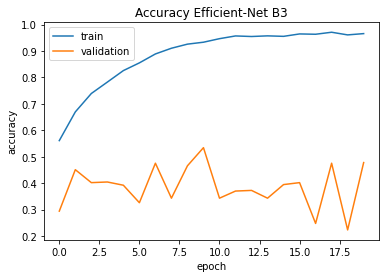

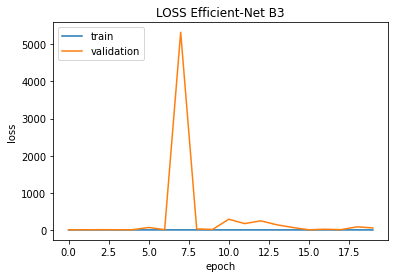

In [12]:
def plot_hist(hist, title):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Accuracy " + title)
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("LOSS " + title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


plot_hist(hist_cnn, title="Efficient-Net B3")

In [13]:
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

13/13 - 2s - loss: 13.6013 - accuracy: 0.5096

Test accuracy: 0.5096153616905212


# Verifica su altri dataset

In [14]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [15]:
path1 = '../input/mel-pmemo/melspectrogram_dataset/'
path2 = '../input/mel-emotify/melspectrogram_dataset/'

# Load the images and the labels
imgs1 = []
imgs2 = []

dirlist1 = sorted_alphanumeric(os.listdir(path1))
dirlist2 = sorted_alphanumeric(os.listdir(path2))


for img in dirlist1:
    
    pic = image.load_img((path1 + img))
    imgs1.append(np.array(pic))
    

for img in dirlist2:
    pic = image.load_img((path2 + img))
    imgs2.append(np.array(pic))
      
        
imgs1 = np.array(imgs1)
imgs2 = np.array(imgs2)

print(imgs1.shape)
print(imgs2.shape)

(3743, 300, 300, 3)
(1990, 300, 300, 3)


In [16]:
df1 = pd.read_csv('../input/mel-pmemo/mel.csv')
df2 = pd.read_csv('../input/mel-emotify/mel.csv')

Y1 = np.array(df1['Label'])
print(Y1.shape)

Y2 = np.array(df2['Label'])
print(Y2.shape)

(3743,)
(1990,)


In [17]:
score = cnn.evaluate(imgs1, Y1, verbose=0)
print('PMEmo - accuracy:', score[1],"\n")

2022-07-08 17:22:29.345609: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1010610000 exceeds 10% of free system memory.
2022-07-08 17:22:30.373215: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1010610000 exceeds 10% of free system memory.


PMEmo - accuracy: 0.3644135594367981 



In [18]:
score = cnn.evaluate(imgs2, Y2, verbose=0)
print('Emotify - accuracy:', score[1],"\n")

Emotify - accuracy: 0.4271356761455536 



# LSTM

In [19]:
for i in np.array(df_ID['ID_song']):
    miss = False
    
    if (i + '-0') not in df['ID'].values:
        miss = True
    if (i + '-1') not in df['ID'].values:
        miss = True
    if (i + '-2') not in df['ID'].values:
        miss = True
    if (i + '-3') not in df['ID'].values:
        miss = True
    if miss:
        df_ID = df_ID[df_ID.ID_song != i] # riga con solo un'immagine
        print("Rimosso ID: " +i)

Rimosso ID: 1678
Rimosso ID: 1687


In [20]:
ID_train, ID_test = train_test_split( np.array(df_ID['ID_song']), test_size=0.20, shuffle = True,  random_state=2)
ID_test, ID_validation = train_test_split( ID_test, test_size=0.5, shuffle = True,  random_state=2)

print(ID_train.shape)
print(ID_test.shape)
print(ID_validation.shape)
ID_test

(718,)
(90,)
(90,)


array(['1331', '1505', '1603', '1736', '1457', '1576', '1512', '1274',
       '1637', '1296', '1173', '1846', '1836', '1441', '1527', '1819',
       '1102', '1741', '1464', '1143', '1590', '1357', '1373', '1213',
       '1252', '1075', '1071', '1465', '1399', '1016', '1601', '1887',
       '1526', '1276', '1874', '1341', '1673', '1883', '1228', '1645',
       '1875', '1740', '1544', '1787', '1823', '1110', '1184', '1383',
       '1824', '1319', '1144', '1782', '1523', '1659', '1633', '1750',
       '1397', '1418', '1380', '1654', '1161', '1147', '1309', '1559',
       '1772', '1376', '1008', '1707', '1305', '1899', '1323', '1848',
       '1153', '1433', '1581', '1285', '1142', '1592', '1180', '1537',
       '1625', '1023', '1021', '1679', '1237', '1206', '1038', '1334',
       '1210', '1566'], dtype=object)

In [21]:
y_train_ID = []
y_test_ID = []
y_validation_ID = []

for i in ID_train:
    if (i + '-0') in df['ID'].values:
        y_train_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_train_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_train_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_train_ID.append(i + '-3')


for i in ID_test:
    if (i + '-0') in df['ID'].values:
        y_test_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_test_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_test_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_test_ID.append(i + '-3')

        
for i in ID_validation:
    if (i + '-0') in df['ID'].values:
        y_validation_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_validation_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_validation_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_validation_ID.append(i + '-3')
        
y_train_ID = np.array(y_train_ID)
y_test_ID = np.array(y_test_ID)
y_validation_ID = np.array(y_validation_ID)

print(y_train_ID.shape)
print(y_test_ID.shape)
print(y_validation_ID.shape)
y_test_ID[:100]

(2872,)
(360,)
(360,)


array(['1331-0', '1331-1', '1331-2', '1331-3', '1505-0', '1505-1',
       '1505-2', '1505-3', '1603-0', '1603-1', '1603-2', '1603-3',
       '1736-0', '1736-1', '1736-2', '1736-3', '1457-0', '1457-1',
       '1457-2', '1457-3', '1576-0', '1576-1', '1576-2', '1576-3',
       '1512-0', '1512-1', '1512-2', '1512-3', '1274-0', '1274-1',
       '1274-2', '1274-3', '1637-0', '1637-1', '1637-2', '1637-3',
       '1296-0', '1296-1', '1296-2', '1296-3', '1173-0', '1173-1',
       '1173-2', '1173-3', '1846-0', '1846-1', '1846-2', '1846-3',
       '1836-0', '1836-1', '1836-2', '1836-3', '1441-0', '1441-1',
       '1441-2', '1441-3', '1527-0', '1527-1', '1527-2', '1527-3',
       '1819-0', '1819-1', '1819-2', '1819-3', '1102-0', '1102-1',
       '1102-2', '1102-3', '1741-0', '1741-1', '1741-2', '1741-3',
       '1464-0', '1464-1', '1464-2', '1464-3', '1143-0', '1143-1',
       '1143-2', '1143-3', '1590-0', '1590-1', '1590-2', '1590-3',
       '1357-0', '1357-1', '1357-2', '1357-3', '1373-0', '1373

In [22]:
# Load the images and the labels
x_train = []
x_test = []
x_validation = []

for img in y_train_ID:

    pic = image.load_img((path + img + '.png'))
    x_train.append(np.array(pic))


for img in y_test_ID:

    pic = image.load_img((path + img + '.png'))
    x_test.append(np.array(pic))

        
for img in y_validation_ID:

    pic = image.load_img((path + img + '.png'))
    x_validation.append(np.array(pic))

    
x_train = np.array(x_train)
x_test = np.array(x_test)
x_validation = np.array(x_validation)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(2872, 300, 300, 3)
(360, 300, 300, 3)
(360, 300, 300, 3)


In [23]:
y_train = []
y_test = []
y_validation = []

for i in ID_train:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_train.append(row['Label'].iloc[0])

for i in ID_test:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_test.append(row['Label'].iloc[0])


for i in ID_validation:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_validation.append(row['Label'].iloc[0])
    
    
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validation = np.array(y_validation)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(718,)
(90,)
(90,)


In [24]:
layer_name = 'flatten'
feature_extractor = Model(inputs=cnn.input, outputs=cnn.get_layer(layer_name).output)

In [25]:
feature_train = feature_extractor.predict(x_train, verbose=1)
feature_test = feature_extractor.predict(x_test, verbose=1)
feature_val = feature_extractor.predict(x_validation, verbose=1)

print(feature_train.shape)
print(feature_test.shape)
print(feature_val.shape)

2022-07-08 17:23:13.939513: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 775440000 exceeds 10% of free system memory.


12/12 [==============================] - 0s 34ms/step
(2872, 1280)
(360, 1280)
(360, 1280)


In [26]:
reshaped_train = np.reshape(feature_train, (int(feature_train.shape[0] / 4), 4, -1))
print(reshaped_train.shape)

reshaped_test = np.reshape(feature_test, (int(feature_test.shape[0] / 4), 4, -1))
print(reshaped_test.shape)

reshaped_val = np.reshape(feature_val, (int(feature_val.shape[0] / 4), 4, -1))
print(reshaped_val.shape)

(718, 4, 1280)
(90, 4, 1280)
(90, 4, 1280)


In [27]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape= reshaped_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [28]:
filepath_lstm="weights.LSTM.hdf5"
checkpoint = ModelCheckpoint(filepath_lstm, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [29]:
hist_lstm = model.fit(reshaped_train, y_train, batch_size=32, epochs=20, validation_data=(reshaped_val, y_validation), callbacks=[checkpoint])

model.load_weights(filepath_lstm)

Epoch 1/20
23/23 [==============================] - 4s 73ms/step - loss: 4.2399 - accuracy: 0.6156 - val_loss: 1.8539 - val_accuracy: 0.7778

Epoch 00001: val_accuracy improved from -inf to 0.77778, saving model to weights.LSTM.hdf5
Epoch 2/20
23/23 [==============================] - 1s 36ms/step - loss: 1.4374 - accuracy: 0.7702 - val_loss: 1.5715 - val_accuracy: 0.7778

Epoch 00002: val_accuracy did not improve from 0.77778
Epoch 3/20
23/23 [==============================] - 1s 37ms/step - loss: 1.2377 - accuracy: 0.7660 - val_loss: 3.7222 - val_accuracy: 0.7444

Epoch 00003: val_accuracy did not improve from 0.77778
Epoch 4/20
23/23 [==============================] - 1s 34ms/step - loss: 1.0773 - accuracy: 0.7855 - val_loss: 1.1416 - val_accuracy: 0.8444

Epoch 00004: val_accuracy improved from 0.77778 to 0.84444, saving model to weights.LSTM.hdf5
Epoch 5/20
23/23 [==============================] - 1s 35ms/step - loss: 0.7162 - accuracy: 0.8217 - val_loss: 1.1460 - val_accuracy: 0.8

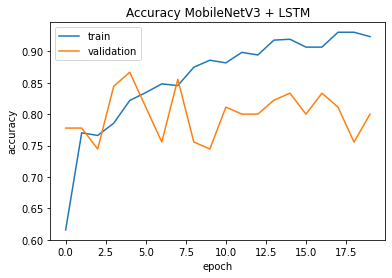

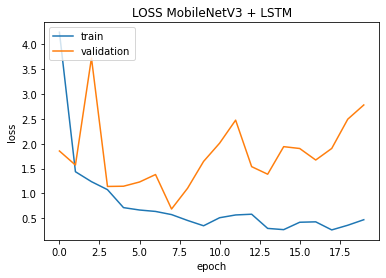

In [30]:
plot_hist(hist_lstm, title="MobileNetV3 + LSTM")

In [31]:
score = model.evaluate(reshaped_test, y_test, verbose=0)
print('LSTM - accuracy:', score[1],"\n")

LSTM - accuracy: 0.7888888716697693 



In [32]:
df1['ID_song'] = df1['ID'].astype(str).str[0:4]
df2['ID_song'] = df2['ID'].astype(str).str[0:4]

df1_ID = pd.DataFrame()
df1_ID['ID_song'] = df1['ID_song'].drop_duplicates()

df2_ID = pd.DataFrame()
df2_ID['ID_song'] = df2['ID_song'].drop_duplicates()

for i in np.array(df1_ID['ID_song']):
    miss = False
    
    if (i + '-0') not in df1['ID'].values:
        miss = True
    if (i + '-1') not in df1['ID'].values:
        miss = True
    if (i + '-2') not in df1['ID'].values:
        miss = True
    if (i + '-3') not in df1['ID'].values:
        miss = True
    if miss:
        df1_ID = df1_ID[df1_ID.ID_song != i] # riga con solo un'immagine
        print("Rimosso ID: " +i)
        
for i in np.array(df2_ID['ID_song']):
    miss = False
    
    if (i + '-0') not in df2['ID'].values:
        miss = True
    if (i + '-1') not in df2['ID'].values:
        miss = True
    if (i + '-2') not in df2['ID'].values:
        miss = True
    if (i + '-3') not in df2['ID'].values:
        miss = True
    if miss:
        df2_ID = df2_ID[df2_ID.ID_song != i] # riga con solo un'immagine
        print("Rimosso ID: " +i)

Rimosso ID: 3069
Rimosso ID: 3084
Rimosso ID: 3196
Rimosso ID: 3228
Rimosso ID: 3342
Rimosso ID: 3381
Rimosso ID: 3437
Rimosso ID: 3438
Rimosso ID: 3558
Rimosso ID: 3584
Rimosso ID: 3611
Rimosso ID: 3636
Rimosso ID: 3688
Rimosso ID: 3692
Rimosso ID: 3758
Rimosso ID: 3759
Rimosso ID: 2040
Rimosso ID: 2066
Rimosso ID: 2073


In [33]:
y1_ID = []
imgs1 = []
Y1_lstm = []

ID1_train = np.array(df1_ID['ID_song'])

for i in ID1_train:
    if (i + '-0') in df1['ID'].values:
        y1_ID.append(i + '-0')
    if (i + '-1') in df1['ID'].values:
        y1_ID.append(i + '-1')
    if (i + '-2') in df1['ID'].values:
        y1_ID.append(i + '-2')
    if (i + '-3') in df1['ID'].values:
        y1_ID.append(i + '-3')
        
y1_ID = np.array(y1_ID)
print(y1_ID.shape)

for img in y1_ID:
    pic = image.load_img((path1 + img + '.png'))
    imgs1.append(np.array(pic))

imgs1 = np.array(imgs1)
print(imgs1.shape)

for i in ID1_train:
    
    row = df1.loc[df1['ID'] == (i + '-0')]
    Y1_lstm.append(row['Label'].iloc[0])
    
Y1_lstm = np.array(Y1_lstm)
print(Y1_lstm.shape)

(3004,)
(3004, 300, 300, 3)
(751,)


In [34]:
y2_ID = []
imgs2 = []
Y2_lstm = []

ID2_train = np.array(df2_ID['ID_song'])

for i in ID2_train:
    if (i + '-0') in df2['ID'].values:
        y2_ID.append(i + '-0')
    if (i + '-1') in df2['ID'].values:
        y2_ID.append(i + '-1')
    if (i + '-2') in df2['ID'].values:
        y2_ID.append(i + '-2')
    if (i + '-3') in df2['ID'].values:
        y2_ID.append(i + '-3')
        
y2_ID = np.array(y2_ID)
print(y2_ID.shape)

for img in y2_ID:
    pic = image.load_img((path2 + img + '.png'))
    imgs2.append(np.array(pic))

imgs2 = np.array(imgs2)
print(imgs2.shape)

for i in ID2_train:
    
    row = df2.loc[df2['ID'] == (i + '-0')]
    Y2_lstm.append(row['Label'].iloc[0])
    
Y2_lstm = np.array(Y2_lstm)
print(Y2_lstm.shape)

(1588,)
(1588, 300, 300, 3)
(397,)


In [35]:
features_imgs1 = feature_extractor.predict(imgs1, verbose=1)
reshaped_imgs1 = np.reshape(features_imgs1, (int(features_imgs1.shape[0] / 4), 4, -1))
score = model.evaluate(reshaped_imgs1, Y1_lstm, verbose=0)
print('PMEmo - accuracy:', score[1],"\n")

94/94 [==============================] - 4s 38ms/step
PMEmo - accuracy: 0.5073235630989075 



In [36]:
features_imgs2 = feature_extractor.predict(imgs2, verbose=1)
reshaped_imgs2 = np.reshape(features_imgs2, (int(features_imgs2.shape[0] / 4), 4, -1))
score = model.evaluate(reshaped_imgs2, Y2_lstm, verbose=0)
print('Emotify - accuracy:', score[1],"\n")

50/50 [==============================] - 2s 39ms/step
Emotify - accuracy: 0.4735516309738159 



# CNN merged + LSTM solo 4Q

In [37]:
base_net = load_model('../input/effnetb3spectrogram/weights.cnn.hdf5')
layer_name = 'flatten'
feature_extractor = Model(inputs=base_net.input, outputs=base_net.get_layer(layer_name).output)

feature_train = feature_extractor.predict(x_train, verbose=1)
feature_test = feature_extractor.predict(x_test, verbose=1)
feature_val = feature_extractor.predict(x_validation, verbose=1)

reshaped_train = np.reshape(feature_train, (int(feature_train.shape[0] / 4), 4, -1))
reshaped_test = np.reshape(feature_test, (int(feature_test.shape[0] / 4), 4, -1))
reshaped_val = np.reshape(feature_val, (int(feature_val.shape[0] / 4), 4, -1))


model = Sequential()
model.add(LSTM(128, activation='relu', input_shape= reshaped_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

checkpoint = ModelCheckpoint(filepath_lstm, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
hist_lstm = model.fit(reshaped_train, y_train, batch_size=32, epochs=20, validation_data=(reshaped_val, y_validation), callbacks=[checkpoint])
model.load_weights(filepath_lstm)

12/12 [==============================] - 0s 34ms/step
Epoch 1/20
23/23 [==============================] - 4s 53ms/step - loss: 3.0326 - accuracy: 0.8384 - val_loss: 1.1284 - val_accuracy: 0.8556

Epoch 00001: val_accuracy improved from -inf to 0.85556, saving model to weights.LSTM.hdf5
Epoch 2/20
23/23 [==============================] - 1s 61ms/step - loss: 1.1986 - accuracy: 0.8900 - val_loss: 0.5931 - val_accuracy: 0.8778

Epoch 00002: val_accuracy improved from 0.85556 to 0.87778, saving model to weights.LSTM.hdf5
Epoch 3/20
23/23 [==============================] - 1s 35ms/step - loss: 0.7756 - accuracy: 0.9039 - val_loss: 0.9442 - val_accuracy: 0.8778

Epoch 00003: val_accuracy did not improve from 0.87778
Epoch 4/20
23/23 [==============================] - 1s 36ms/step - loss: 0.7945 - accuracy: 0.9095 - val_loss: 1.0401 - val_accuracy: 0.8444

Epoch 00004: val_accuracy did not improve from 0.87778
Epoch 5/20
23/23 [==============================] - 1s 35ms/step - loss: 0.7342 - a

In [38]:
score = model.evaluate(reshaped_test, y_test, verbose=0)
print('LSTM - accuracy:', score[1],"\n")

LSTM - accuracy: 0.9222221970558167 



In [39]:
features_imgs1 = feature_extractor.predict(imgs1, verbose=1)
reshaped_imgs1 = np.reshape(features_imgs1, (int(features_imgs1.shape[0] / 4), 4, -1))
score = model.evaluate(reshaped_imgs1, Y1_lstm, verbose=0)
print('PMEmo - accuracy:', score[1],"\n")

94/94 [==============================] - 3s 35ms/step
PMEmo - accuracy: 0.6551265120506287 



In [40]:
features_imgs2 = feature_extractor.predict(imgs2, verbose=1)
reshaped_imgs2 = np.reshape(features_imgs2, (int(features_imgs2.shape[0] / 4), 4, -1))
score = model.evaluate(reshaped_imgs2, Y2_lstm, verbose=0)
print('Emotify - accuracy:', score[1],"\n")

50/50 [==============================] - 2s 35ms/step
Emotify - accuracy: 0.6624684929847717 



# LSTM - ALL DATASET MERGED

In [41]:
df1 = pd.read_csv('../input/mel-pmemo/mel.csv')
df2 = pd.read_csv('../input/mel-4q/mel.csv')
df3 = pd.read_csv('../input/mel-emotify/mel.csv')

df1['ID_song'] = df1['ID'].astype(str).str[0:4]
df2['ID_song'] = df2['ID'].astype(str).str[0:4]
df3['ID_song'] = df3['ID'].astype(str).str[0:4]

df1_ID = pd.DataFrame()
df1_ID['ID_song'] = df1['ID_song'].drop_duplicates()

df2_ID = pd.DataFrame()
df2_ID['ID_song'] = df2['ID_song'].drop_duplicates()

df3_ID = pd.DataFrame()
df3_ID['ID_song'] = df3['ID_song'].drop_duplicates()


df_ID = pd.concat([df1_ID[:len(df1_ID)-1], df2_ID, df3_ID], ignore_index=True, sort=False)
df = pd.concat([df1, df2, df3], ignore_index=True, sort=False)
                   
                   
for i in np.array(df_ID['ID_song']):
    miss = False
    
    if (i + '-0') not in df['ID'].values:
        miss = True
    if (i + '-1') not in df['ID'].values:
        miss = True
    if (i + '-2') not in df['ID'].values:
        miss = True
    if (i + '-3') not in df['ID'].values:
        miss = True
    if miss:
        df_ID = df_ID[df_ID.ID_song != i] # riga con solo un'immagine
        print("Rimosso ID: " +i)
        


Rimosso ID: 3069
Rimosso ID: 3084
Rimosso ID: 3196
Rimosso ID: 3228
Rimosso ID: 3342
Rimosso ID: 3381
Rimosso ID: 3437
Rimosso ID: 3438
Rimosso ID: 3558
Rimosso ID: 3584
Rimosso ID: 3611
Rimosso ID: 3636
Rimosso ID: 3688
Rimosso ID: 3692
Rimosso ID: 3758
Rimosso ID: 3759
Rimosso ID: 1678
Rimosso ID: 1687
Rimosso ID: 2040
Rimosso ID: 2066
Rimosso ID: 2073


In [42]:
ID_train, ID_test = train_test_split( np.array(df_ID['ID_song']), test_size=0.30, shuffle = True,  random_state=1)
ID_test, ID_validation = train_test_split( ID_test, test_size=0.5, shuffle = True,  random_state=1)

print(ID_train.shape)
print(ID_test.shape)
print(ID_validation.shape)
ID_test

(1431,)
(307,)
(307,)


array(['1707', '1121', '1251', '1730', '3060', '3001', '1243', '2077',
       '3606', '3742', '2003', '2208', '3897', '1898', '3020', '3184',
       '1879', '1868', '2006', '3079', '2126', '3066', '1445', '1404',
       '1881', '3487', '3050', '1142', '1227', '2301', '2218', '3354',
       '1139', '1836', '3107', '1484', '1119', '3935', '3049', '3047',
       '2079', '2183', '2131', '1789', '3514', '1548', '2051', '1109',
       '1547', '2106', '1374', '2391', '1645', '1409', '1344', '3827',
       '3486', '1138', '1581', '2001', '1241', '2227', '3102', '3490',
       '1417', '1829', '1400', '3572', '3301', '2318', '1614', '2021',
       '1847', '3562', '1750', '2166', '3859', '2231', '1085', '1456',
       '2202', '3784', '1025', '3848', '3269', '2262', '3137', '3388',
       '1464', '3414', '1194', '1573', '3436', '3093', '3573', '1561',
       '1446', '3412', '1802', '3203', '3693', '3038', '3204', '1744',
       '3580', '1457', '2159', '3150', '1353', '2111', '1351', '1058',
      

In [43]:
y_train_ID = []
y_test_ID = []
y_validation_ID = []

for i in ID_train:
    if (i + '-0') in df['ID'].values:
        y_train_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_train_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_train_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_train_ID.append(i + '-3')


for i in ID_test:
    if (i + '-0') in df['ID'].values:
        y_test_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_test_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_test_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_test_ID.append(i + '-3')

        
for i in ID_validation:
    if (i + '-0') in df['ID'].values:
        y_validation_ID.append(i + '-0')
    if (i + '-1') in df['ID'].values:
        y_validation_ID.append(i + '-1')
    if (i + '-2') in df['ID'].values:
        y_validation_ID.append(i + '-2')
    if (i + '-3') in df['ID'].values:
        y_validation_ID.append(i + '-3')

        
y_train_ID = np.array(y_train_ID)
y_test_ID = np.array(y_test_ID)
y_validation_ID = np.array(y_validation_ID)

print(y_train_ID.shape)
print(y_test_ID.shape)
print(y_validation_ID.shape)
y_test_ID[:100]

(5724,)
(1228,)
(1228,)


array(['1707-0', '1707-1', '1707-2', '1707-3', '1121-0', '1121-1',
       '1121-2', '1121-3', '1251-0', '1251-1', '1251-2', '1251-3',
       '1730-0', '1730-1', '1730-2', '1730-3', '3060-0', '3060-1',
       '3060-2', '3060-3', '3001-0', '3001-1', '3001-2', '3001-3',
       '1243-0', '1243-1', '1243-2', '1243-3', '2077-0', '2077-1',
       '2077-2', '2077-3', '3606-0', '3606-1', '3606-2', '3606-3',
       '3742-0', '3742-1', '3742-2', '3742-3', '2003-0', '2003-1',
       '2003-2', '2003-3', '2208-0', '2208-1', '2208-2', '2208-3',
       '3897-0', '3897-1', '3897-2', '3897-3', '1898-0', '1898-1',
       '1898-2', '1898-3', '3020-0', '3020-1', '3020-2', '3020-3',
       '3184-0', '3184-1', '3184-2', '3184-3', '1879-0', '1879-1',
       '1879-2', '1879-3', '1868-0', '1868-1', '1868-2', '1868-3',
       '2006-0', '2006-1', '2006-2', '2006-3', '3079-0', '3079-1',
       '3079-2', '3079-3', '2126-0', '2126-1', '2126-2', '2126-3',
       '3066-0', '3066-1', '3066-2', '3066-3', '1445-0', '1445

In [44]:
path1 = '../input/mel-pmemo/melspectrogram_dataset/'
path2 = '../input/mel-4q/melspectrogram_dataset/'
path3 = '../input/mel-emotify/melspectrogram_dataset/'


# Load the images and the labels
x_train = []
x_test = []
x_validation = []

for img in y_train_ID:
    if img[0] == '3':
        pic = image.load_img((path1 + img + '.png'))
        x_train.append(np.array(pic))
    elif img[0] == '1':
        pic = image.load_img((path2 + img + '.png'))
        x_train.append(np.array(pic))
    elif img[0] == '2':
        pic = image.load_img((path3 + img + '.png'))
        x_train.append(np.array(pic))

for img in y_test_ID:
    if img[0] == '3':
        pic = image.load_img((path1 + img + '.png'))
        x_test.append(np.array(pic))
    elif img[0] == '1':
        pic = image.load_img((path2 + img + '.png'))
        x_test.append(np.array(pic))
    elif img[0] == '2':
        pic = image.load_img((path3 + img + '.png'))
        x_test.append(np.array(pic))
        
for img in y_validation_ID:
    if img[0] == '3':
        pic = image.load_img((path1 + img + '.png'))
        x_validation.append(np.array(pic))
    elif img[0] == '1':
        pic = image.load_img((path2 + img + '.png'))
        x_validation.append(np.array(pic))
    elif img[0] == '2':
        pic = image.load_img((path3 + img + '.png'))
        x_validation.append(np.array(pic))

    
x_train = np.array(x_train)
x_test = np.array(x_test)
x_validation = np.array(x_validation)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(5724, 300, 300, 3)
(1228, 300, 300, 3)
(1228, 300, 300, 3)


In [45]:
y_train = []
y_test = []
y_validation = []

for i in ID_train:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_train.append(row['Label'].iloc[0])

for i in ID_test:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_test.append(row['Label'].iloc[0])


for i in ID_validation:
    
    row = df.loc[df['ID'] == (i + '-0')]
    y_validation.append(row['Label'].iloc[0])
    
    
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validation = np.array(y_validation)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(1431,)
(307,)
(307,)


In [46]:
feature_train = feature_extractor.predict(x_train, verbose=1)
feature_test = feature_extractor.predict(x_test, verbose=1)
feature_val = feature_extractor.predict(x_validation, verbose=1)

print(feature_train.shape)
print(feature_test.shape)
print(feature_val.shape)

39/39 [==============================] - 1s 34ms/step
(5724, 1280)
(1228, 1280)
(1228, 1280)


In [47]:
reshaped_train = np.reshape(feature_train, (int(feature_train.shape[0] / 4), 4, -1))
print(reshaped_train.shape)

reshaped_test = np.reshape(feature_test, (int(feature_test.shape[0] / 4), 4, -1))
print(reshaped_test.shape)

reshaped_val = np.reshape(feature_val, (int(feature_val.shape[0] / 4), 4, -1))
print(reshaped_val.shape)

(1431, 4, 1280)
(307, 4, 1280)
(307, 4, 1280)


In [48]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape= reshaped_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

checkpoint = ModelCheckpoint(filepath_lstm, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


hist_lstm = model.fit(reshaped_train, y_train, batch_size=32, epochs=20, validation_data=(reshaped_val, y_validation), callbacks=[checkpoint])
model.load_weights(filepath_lstm)

Epoch 1/20
45/45 [==============================] - 5s 41ms/step - loss: 4.2008 - accuracy: 0.6918 - val_loss: 1.3452 - val_accuracy: 0.7590

Epoch 00001: val_accuracy improved from -inf to 0.75896, saving model to weights.LSTM.hdf5
Epoch 2/20
45/45 [==============================] - 2s 35ms/step - loss: 1.8163 - accuracy: 0.7184 - val_loss: 0.8350 - val_accuracy: 0.7590

Epoch 00002: val_accuracy did not improve from 0.75896
Epoch 3/20
45/45 [==============================] - 2s 35ms/step - loss: 1.1701 - accuracy: 0.7505 - val_loss: 0.7846 - val_accuracy: 0.7134

Epoch 00003: val_accuracy did not improve from 0.75896
Epoch 4/20
45/45 [==============================] - 2s 34ms/step - loss: 1.0288 - accuracy: 0.7191 - val_loss: 0.9030 - val_accuracy: 0.7720

Epoch 00004: val_accuracy improved from 0.75896 to 0.77199, saving model to weights.LSTM.hdf5
Epoch 5/20
45/45 [==============================] - 3s 59ms/step - loss: 0.8790 - accuracy: 0.7449 - val_loss: 0.6525 - val_accuracy: 0.7

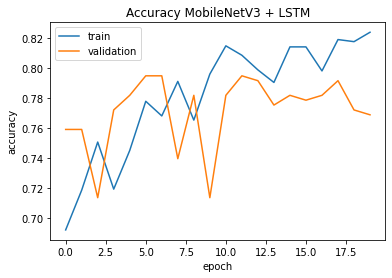

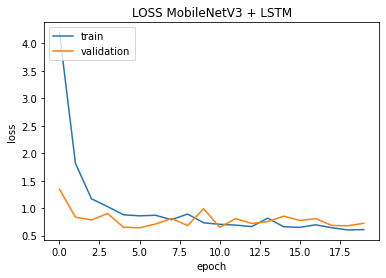

In [49]:
plot_hist(hist_lstm, title="MobileNetV3 + LSTM")

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Convolutional Neural Network - accuracy: 0.8241042494773865 



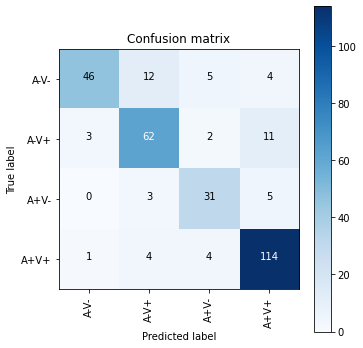

In [51]:
score = model.evaluate(reshaped_test, y_test, verbose=0)
print('Convolutional Neural Network - accuracy:', score[1],"\n")
Y_pred = model.predict(reshaped_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = ['A-V-','A-V+','A+V-','A+V+']) 
plt.show()